#<font color=#000080>**Default Credit Card Prediction Project** 

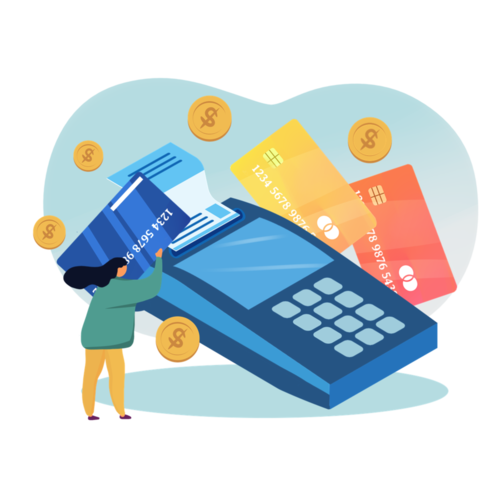

#<font color='red'> **Business Understanding**

**De nos jours, le nombre de détenteurs de cartes bancaires, associées à une ligne de crédit revolving a augmenté. 
Mais avec certaines crise, le taux de défaut sur les encours de prêts sur ces cartes de crédit a fortement augmenté.
Dans un système financier performant, le profilage des bons clients et la prévision du risque sont des éléments essentiels du bon fonctionnement des établissements bancaires.
Comment alors évaluer correctement si quelqu'un va présenter un risque de crédit ou non ?
Donc notre projet vise à combler cette lacune d'incertitude en utilisant une approche basée sur des données historiques des clients de cartes de crédit en conjonction avec l'apprentissage automatique pour prédire si un client aura un défaut de paiement de cartes de crédit ou non.**

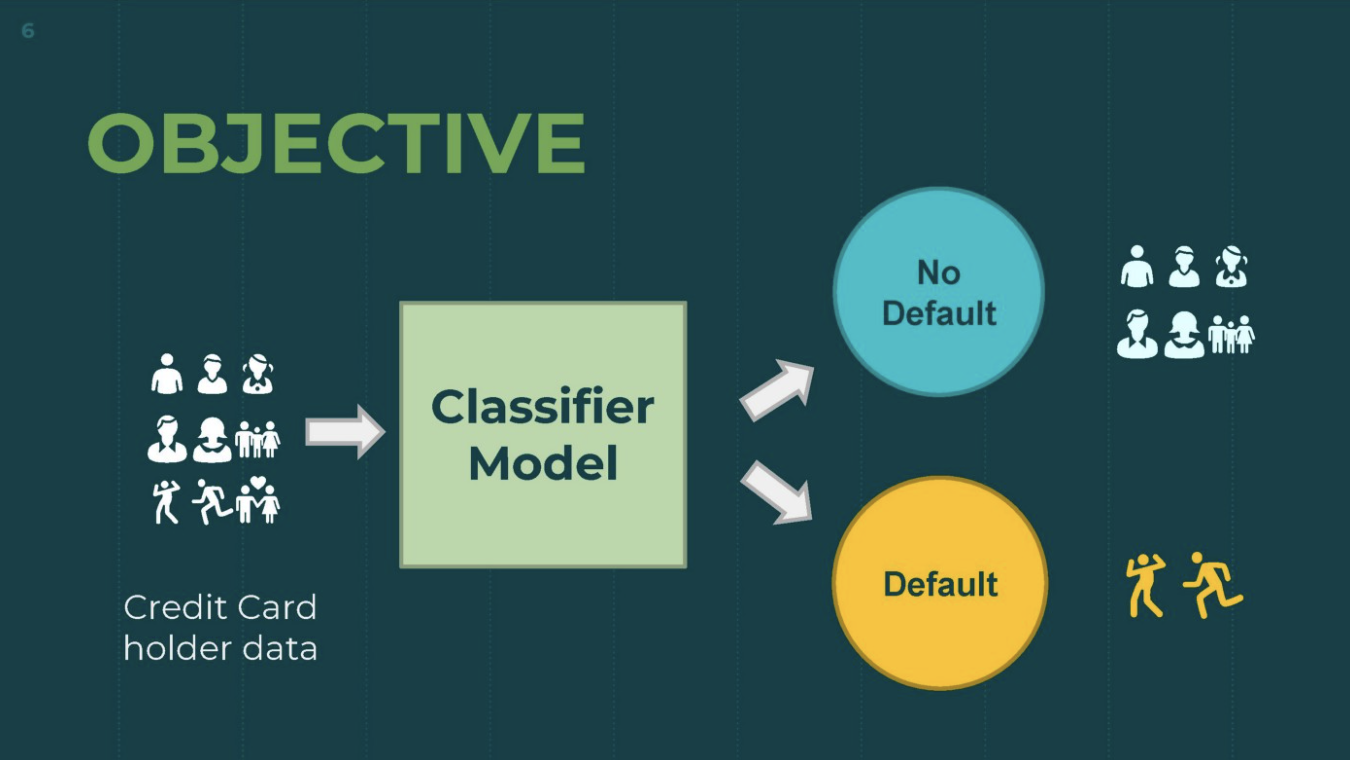

**Nous allons essayer de développer des modèles de Machine Learning afin d’atteindre deux objectifs principaux :**

1.   Apporter plus de cohérence au processus de crédit.
2.   Enquêter sur les signes révélateurs d'une personne qui fera un défaut de paiement.



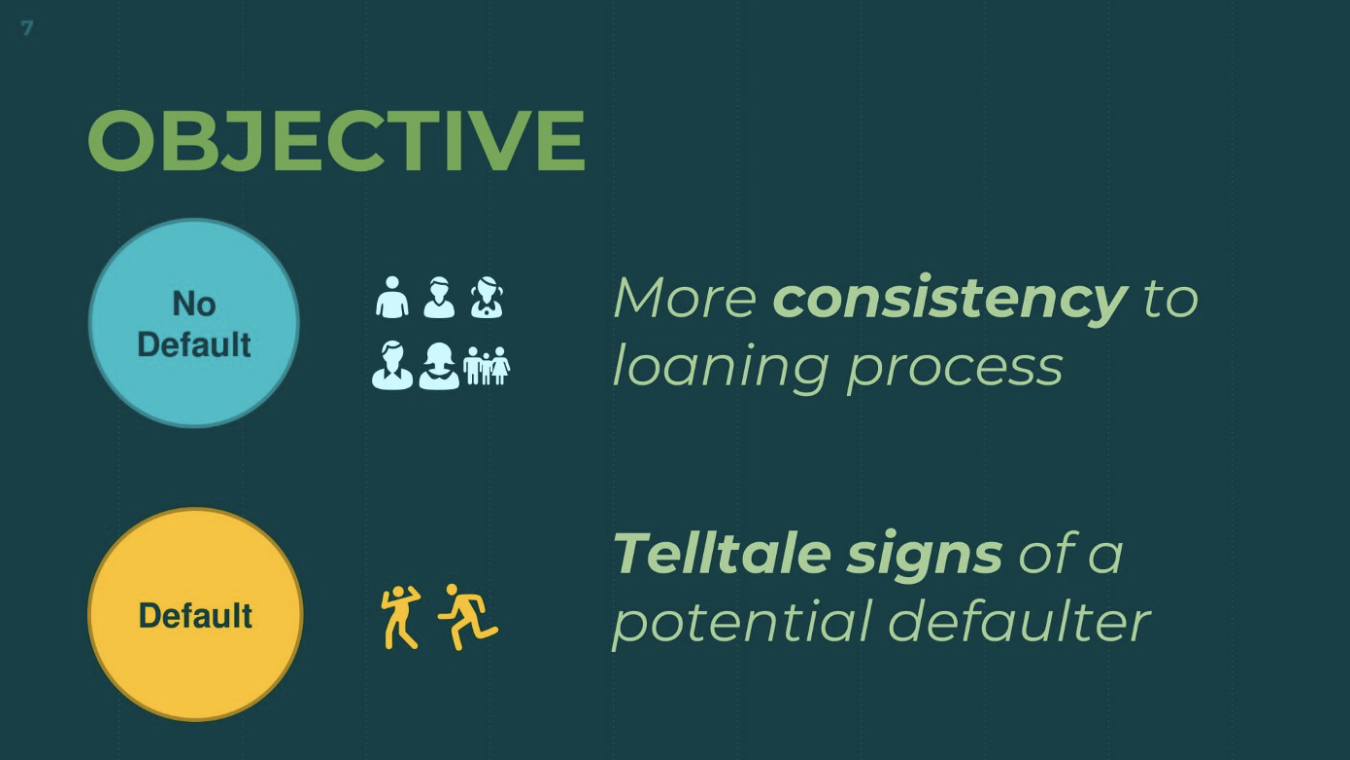

#<font color='red'> **Data Understanding**

**Description du DataSet :**

Le DataSet considérée dans cette analyse est le DataSet « Default of Credit Card Clients » publié sous la licence publique de Creative Commons et disponible sur le site Web UCI Machine Learning Repository.

Le DataSet contient 30 000 observations de 25 variables provenant d'une banque (ainsi que d'un émetteur d'espèces et de cartes de crédit à Taïwan) ; où chaque observation correspond à un client de carte de crédit particulier. Parmi les 30 000 observations au total, 6 636 observations (22,1 %) sont des porteurs de cartes avec défaut de paiement.

Les 25 variables de ce DataSet comprennent des variables démographiques (sexe, niveau d'éducation, statut matrimonial et âge) et des variables financières des données de paiement sur 6 mois d'avril 2005 à septembre 2005 (montant du crédit accordé, statuts de remboursement mensuels, montant des relevés de factures et montant mensuel des versements antérieurs).

**Compréhension des features :**

**ID:** ID of each client

**LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit

**SEX:** Gender (1=male, 2=female)

**EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

**MARRIAGE:** Marital status (1=married, 2=single, 3=others)

**AGE:** Age in years

— —

**PAY_0:**Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

**PAY_2:** Repayment status in August, 2005 (scale same as above)
…;

**PAY_6:** Repayment status in April, 2005 (scale same as above)

— —

**BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar)

**BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar)
…;

**BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)

— —

**PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar)

**PAY_AMT2:** Amount of previous payment in August, 2005 (NT dollar)
…;

**PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)

**default.payment.next.month:** Default payment (1=yes, 0=no) : Target variable




##**Data Exploration**


**Importation des Librairies**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras 
import tensorflow as tf
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, auc

**Découvrir La Data**

In [ ]:
df = pd.read_csv("Data.csv",header=None)

In [ ]:
df.head()

0          1    2   ...        22        23                          24
0  NaN         X1   X2  ...       X22       X23                           Y
1   ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
2    1      20000    2  ...         0         0                           1
3    2     120000    2  ...         0      2000                           1
4    3      90000    2  ...      1000      5000                           0

[5 rows x 25 columns]

On voit que la data n'a pas le bon header donc on va régler ce problème en affectant le header Titre (ID,LIMIT_Bal...) et en enlevant la ligne des X (X1,X2...)

In [ ]:
df=df.rename(columns=df.iloc[1])

In [ ]:
df.drop(df.index[[0,1]],inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

ID LIMIT_BAL SEX  ... PAY_AMT5 PAY_AMT6 default payment next month
0  1     20000   2  ...        0        0                          1
1  2    120000   2  ...        0     2000                          1
2  3     90000   2  ...     1000     5000                          0
3  4     50000   2  ...     1069     1000                          0
4  5     50000   1  ...      689      679                          0

[5 rows x 25 columns]

In [ ]:
df.shape

(30000, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

On a toutes les colonnes sont de type objets meme si on voit qu'ils sont numériques donc on a pas besoin de passer par les méthodes d'encodage il suffit donc de caster toute notre data en Int .

In [ ]:
df=df.astype(int)

In [ ]:
df[['ID']]

ID
0          1
1          2
2          3
3          4
4          5
...      ...
29995  29996
29996  29997
29997  29998
29998  29999
29999  30000

[30000 rows x 1 columns]

In [1]:
df.drop('ID',axis=1,inplace=True)

NameError: ignored

La Colonne ID comme vu en dessous represente l'indexation de la Data +1 elle ne m'ajoute donc aucune information donc on l'enleve.

In [ ]:
df.describe()

LIMIT_BAL           SEX  ...       PAY_AMT6  default payment next month
count    30000.000000  30000.000000  ...   30000.000000                30000.000000
mean    167484.322667      1.603733  ...    5215.502567                    0.221200
std     129747.661567      0.489129  ...   17777.465775                    0.415062
min      10000.000000      1.000000  ...       0.000000                    0.000000
25%      50000.000000      1.000000  ...     117.750000                    0.000000
50%     140000.000000      2.000000  ...    1500.000000                    0.000000
75%     240000.000000      2.000000  ...    4000.000000                    0.000000
max    1000000.000000      2.000000  ...  528666.000000                    1.000000

[8 rows x 24 columns]

La Limit Balance Ainsi que les colonnes de Bill_AMT represente un certain ecart entre la moyenne et le maximum on doit donc penser a visualiser ces colonnes la et penser a enlever les outliers si il y'en a de plus il faudrait voir et expliquer les valeurs négatives au sein des Bill (exmp BILL_AMT 1 BILL_AMT2) et finalement n peut penser a une standardisation on a des valeurs qui sont entre -2 et 8 (PAY) et d'autres qui arrive jusqu'a 1000000.000000 (LIMIT_BAL)

In [ ]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

On retrouve qu'on a aucune valeur manquante dans notre Dataset cela dit on peut avoir des valeurs erronées au sein de notre Data d'ou notre analyse qui va suivre. De Plus on remarque qu'on a Pay_0 et puis Pay_2 il manque Pay_1 et donc on va renommer notre colonne Pay_0 par Pay_1 pour avoir une Dataset plus organisée.

In [ ]:
df=df.rename({'PAY_0': 'PAY_1'}, axis=1)

## **Data Visualisation** 

### **Visualisation Des De La Distribution de La Data**

**a) Valeurs Qualitatives**

In [ ]:
marriage_count = df['MARRIAGE'].value_counts().reset_index().rename(columns={'index':'index','MARRIAGE':'count'})

In [ ]:
fig = go.Figure(go.Bar(
    x = marriage_count['index'],y = marriage_count['count'],text=marriage_count['count'],marker={'color': marriage_count['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of marriage',xaxis_title="Marriage status",yaxis_title="Number of count")
fig.show()

##### Le mariage a l'étiquette 0 (others) , qui n'est pas documentée et l'étiquette 3 qui est attribué à divorcée On pourrait donc investir et emmetre des hypothese qu'on a la valeur 0 . 

Nous remarquons également que les célibataires ont le pourcentage le plus élevé par rapport aux autres états matrimoniaux.
Il faut prendre ça en considération

In [ ]:
edu_count = df['EDUCATION'].value_counts().reset_index().rename(columns={'index':'index','EDUCATION':'count'})

In [ ]:
edu_count['index'][0] = 'University'
edu_count['index'][1] = 'Graduate School'
edu_count['index'][2] = 'High school'
edu_count['index'][3] = 'Unknown 1'
edu_count['index'][4] = 'Others'
edu_count['index'][5] = 'Unknown 2'
edu_count['index'][6] = 'Unknown 3'

Ici on va compter le nombre des différents status d'éducation par leur signification 

In [ ]:
fig = go.Figure(go.Bar(
    x = edu_count['index'],y = edu_count['count'],text = edu_count['count'],marker={'color': edu_count['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of education',xaxis_title="Education status",yaxis_title="Number of count")
fig.show()

##### L'éducation a l'étiquette 0, l'étiquette 5 et l'étiquette 6, qui ne sont pas documentés. De plus, la plupart des clients sont bien éduqués ils sont des diplomés de l'université.

In [ ]:
sex_count = df['SEX'].value_counts().reset_index().rename(columns={'index':'index','SEX':'count'})

In [ ]:
sex_count['index'][1] = 'Male'
sex_count['index'][0] = 'Female'

In [ ]:
fig = go.Figure(go.Bar(
    x = sex_count['index'],y = sex_count['count'],text=sex_count['count'],marker={'color': sex_count['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of gender',xaxis_title="Gender",yaxis_title="Number of count")
fig.show()

##### Il semble qu'il y ait plus de clients féminins que masculins donc il faudrait prendre en compte ce facteur là lors du training et de l'évaluation du modéle.


**b) Valeurs Quantitatives**

In [ ]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

In [ ]:
fig = make_subplots(rows= 3, cols=2,subplot_titles=bills.columns.to_list())  

fig.add_trace(go.Histogram(x= df["BILL_AMT1"],name='BILL_AMT1'),row = 1, col = 1)
fig.add_trace(go.Histogram(x= df["BILL_AMT2"],name='BILL_AMT2'),row = 2, col = 2)
fig.add_trace(go.Histogram(x= df["BILL_AMT3"],name='BILL_AMT3'),row = 3, col = 1)
fig.add_trace(go.Histogram(x= df["BILL_AMT4"],name='BILL_AMT4'),row = 1, col = 2)
fig.add_trace(go.Histogram(x= df["BILL_AMT5"],name='BILL_AMT5'),row = 2, col = 1)
fig.add_trace(go.Histogram(x= df["BILL_AMT6"],name='BILL_AMT6'),row = 3, col = 2)


fig.update_layout(height=600, width=800, title_text="Histogram Subplots of Bill Amount")
fig.show()

Tous les montants des factures sont très asymétriques à droite, une transformation peut donc être nécessaire .

In [ ]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [ ]:
fig = make_subplots(rows= 3, cols=2,subplot_titles=pay.columns.to_list())  

fig.add_trace(go.Histogram(x= df["PAY_AMT1"],name='PAY_AMT1'),row = 1, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_AMT2"],name='PAY_AMT2'),row = 2, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_AMT3"],name='PAY_AMT3'),row = 3, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_AMT4"],name='PAY_AMT4'),row = 1, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_AMT5"],name='PAY_AMT5'),row = 2, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_AMT6"],name='PAY_AMT6'),row = 3, col = 2)


fig.update_layout(height=600, width=800, title_text="Histogram Subplots of Amount of Previous Payment")
fig.show()

De plus, tous les montants des factures précédentes sont fortement asymétriques, une transformation peut donc être nécessaire !

In [ ]:
pay_s = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [ ]:
df['PAY_1'].value_counts().index.to_list().sort()

In [ ]:
fig = make_subplots(rows= 3, cols=2,subplot_titles=pay_s.columns.to_list())  

fig.add_trace(go.Histogram(x= df["PAY_1"],name='PAY_1'),row = 1, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_2"],name='PAY_2'),row = 2, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_3"],name='PAY_3'),row = 3, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_4"],name='PAY_4'),row = 1, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_5"],name='PAY_5'),row = 2, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_6"],name='PAY_6'),row = 3, col = 2)


fig.update_layout(bargap=0.2,height=600, width=800, title_text="Histogram Subplots of Previous Payment Status")
fig.show()

##### La Majorité des individus ont la valeur 0 dans Les Pay c'est a dire ils  payent en prenant un crédit .

In [ ]:
fig =  go.Figure(data=[go.Histogram(x= df["AGE"])])
fig.show()

##### En regardant la distribution, il est clair qu'il y a plus de personnes qui sont entre 20 et 30 ans et qu'elle continue de diminuer après 30 ans. C'est aussi un peu asymétrique à droite. Il faudrait donc prendre ça en compte .

In [ ]:
fig =  go.Figure(data=[go.Histogram(x= df["LIMIT_BAL"])])
fig.show()

##### De plus en plus de personnes se sont créditées entre 10 000 et 400 000. Nous pouvons probablement regrouper les personnes selon leur crédit pris. Nous verrons cela dans l'ingénierie des fonctionnalités !

In [ ]:
target_count = df['default payment next month'].value_counts().reset_index().rename(columns={'index':'index','default payment next month':'count'})
fig = go.Figure(go.Bar(
    x = target_count['index'],y = target_count['count'],text=target_count['count'],marker={'color': target_count['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of defaulter',xaxis_title="Status of Defaulting",yaxis_title="Number of count")
fig.show()

#####  Les données présentent un déséquilibre par rapport à la valeur cible.

### **La Corrélation Entre Les Données**

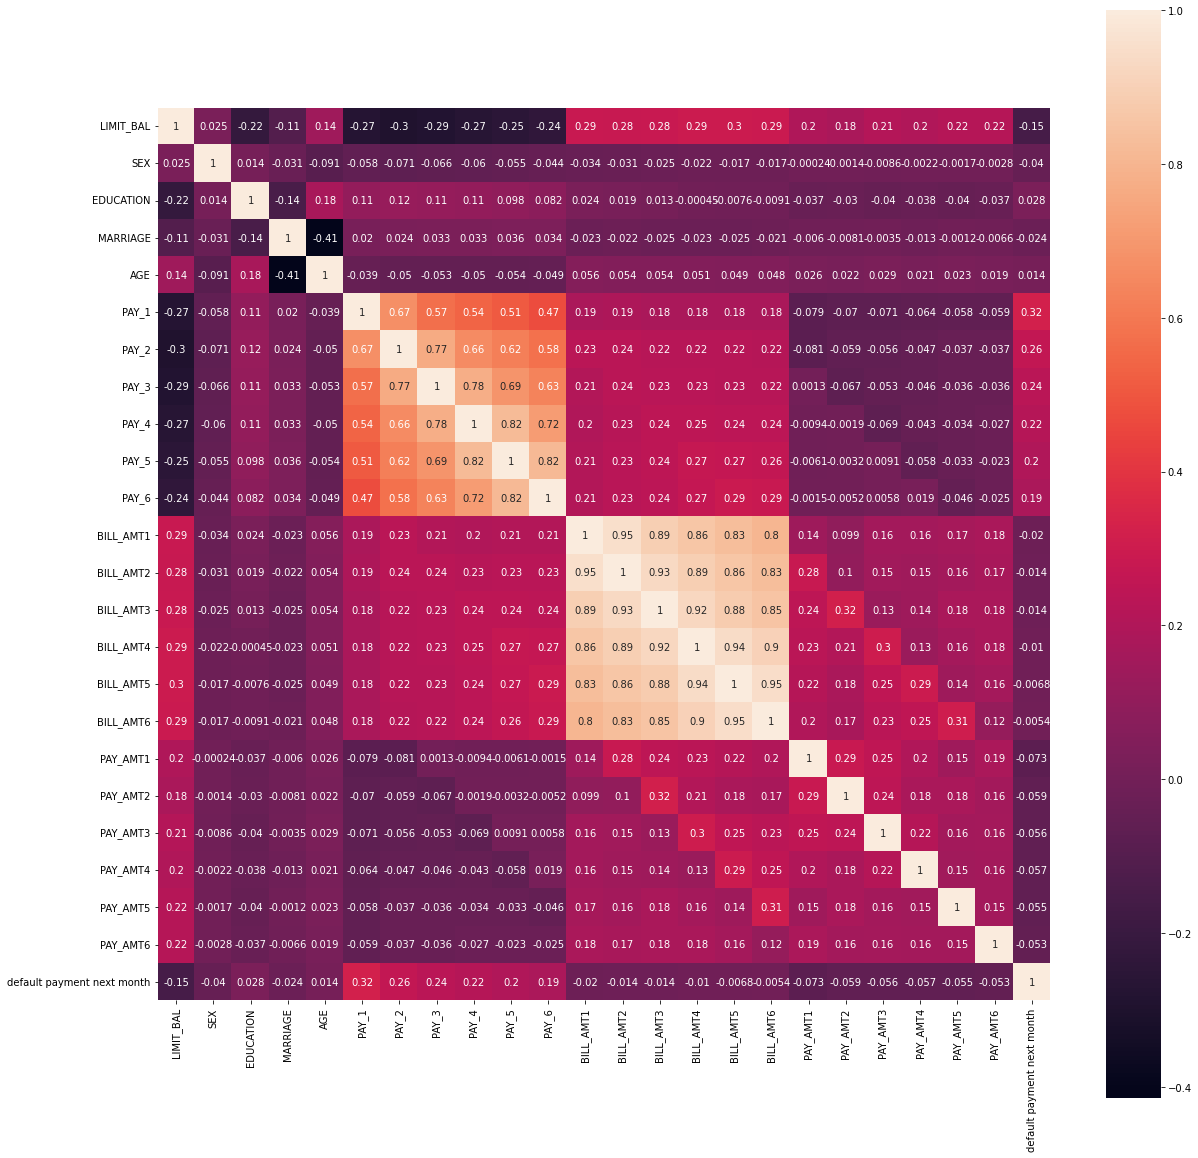

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True,square = True)

##### C'est un graphique de corrélation intéressant. Le heatmat montre que les caractéristiques sont corrélées les unes aux autres (colinéarité), comme PAY_0,2,3,4,5,6 et BILL_AMT1,2,3,4,5,6. Dans ces cas, la corrélation est positive.du coup on va se concentrer sur ça encore plus.

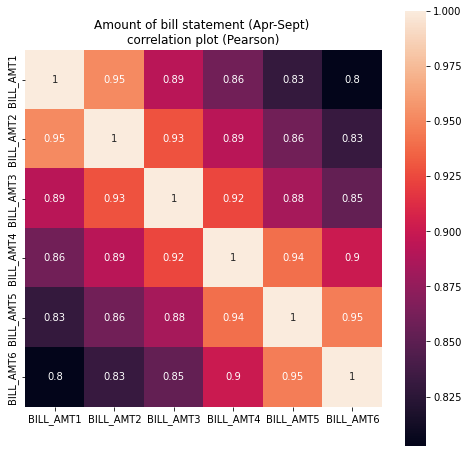

In [ ]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,annot = True,square = True)
plt.show()

La corrélation diminue avec la distance entre les mois. Les corrélations les plus faibles se situent entre septembre et avril.


Vérifions la corrélation du montant du paiement précédent en avril - septembre 2005.

en effet on peut penser du a la forte corrélation qu'on pourrait regrouper certains  BILL_AMT ensembles surtout ceux qui se succedent et qui ont des corrélations qui dépassent 80%

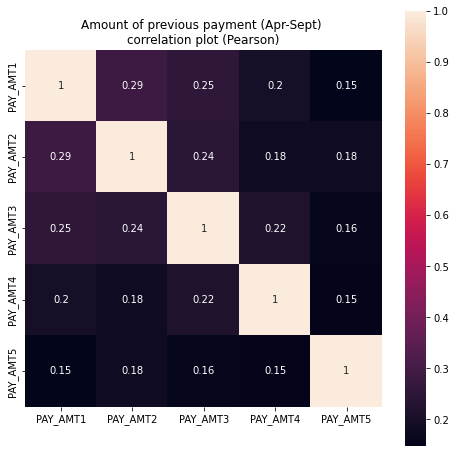

In [ ]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,annot = True,square = True)
plt.show()

Il n'y a pas de corrélations entre les montants des paiements précédents pour avril-septembre 2005.

Vérifions la corrélation entre le statut de remboursement en avril - septembre 2005.

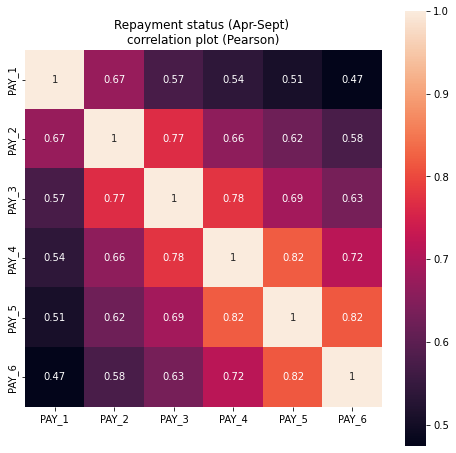

In [ ]:
var = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,annot = True,square = True)
plt.show()

La corrélation diminue avec la distance entre les mois. Les corrélations les plus faibles se situent entre septembre et avril.

In [ ]:
corr = df.drop(['default payment next month'],axis=1)

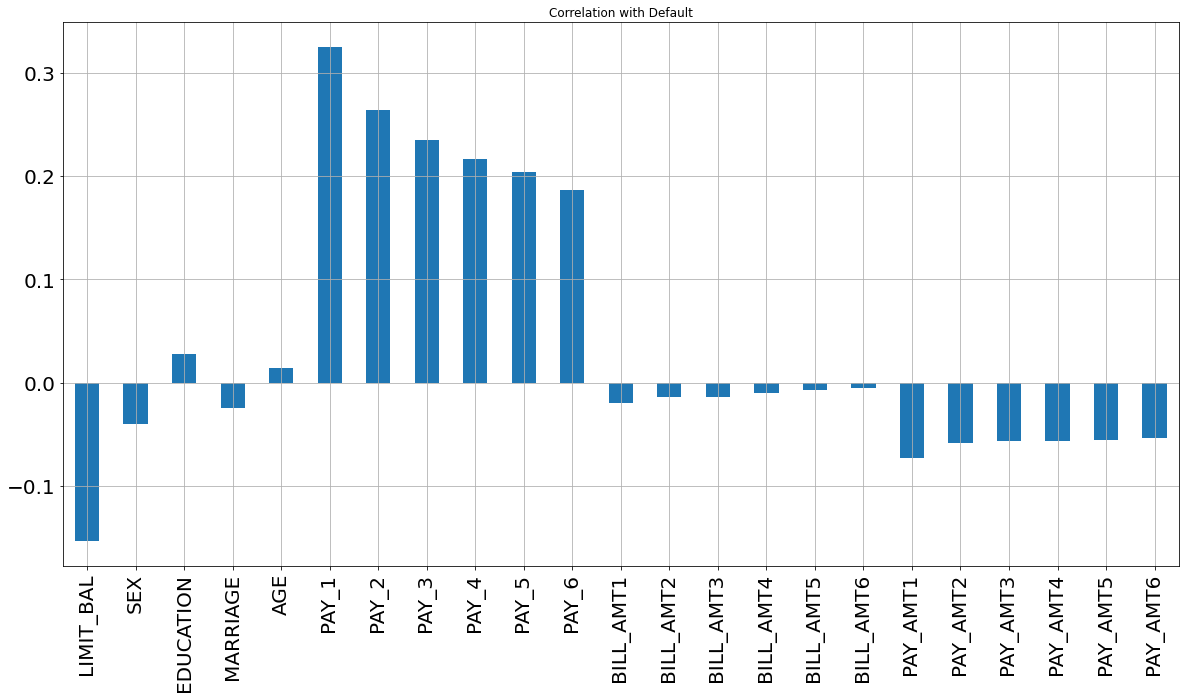

In [ ]:
corr.corrwith(df['default payment next month']).plot.bar(
        figsize = (20, 10), title = "Correlation with Default", fontsize = 20,
        rot = 90, grid = True)

Maintenant qu'on a visualisé les corrélations entre les features on va visualiser par rapport a notre Target. comme on voit il ya les features Pay qui sont trés corrélés d'une facon positives et les Pay_AMT d'une facon négative reste les features Bill qui s'approche un peu de 0 et donc on pourra pas réelement conclure .

### **Analyser Les Relations Entres Nos Features**

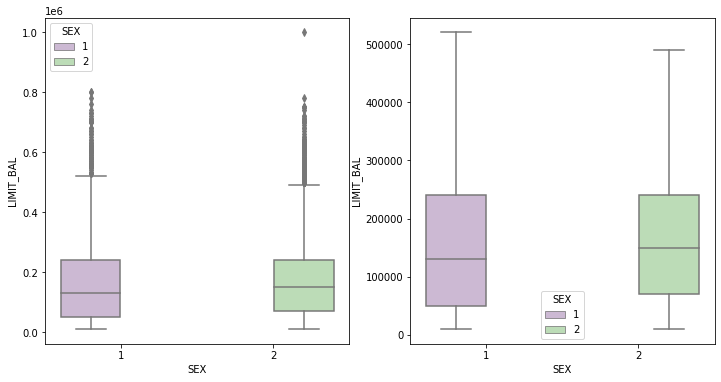

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=False)
plt.show()

Le montant du crédit limite est assez équilibré entre les sexes a peu près 250000. Les hommes ont un Quartile2 légèrement plus petit et des Quartiles3 et Quartiles4 plus grands et une moyenne inférieure. Les femmes ont une valeur maximale de valeur aberrante plus élevée.
Les femmes ont un Quartile2 légèrement plus petit et des Quartiles3 et Quartiles4 plus grands.
On déduit que si les niveaux de quartiles ne sont pas les memes, il n ya pas de dépendances entre la variable qualitative et quantitaive 
LIMIT_BAL et le sex.

In [ ]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

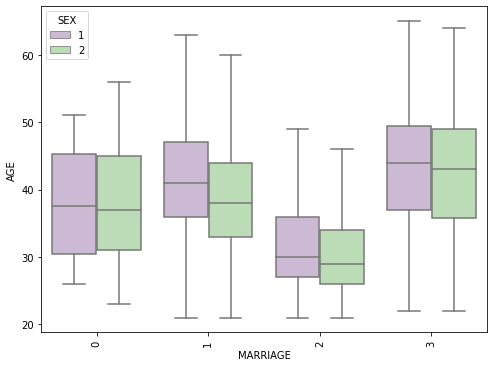

In [ ]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)



Les hommes mariés ont un âge moyen supérieur aux femmes mariées. Les hommes célibataires ont également une valeur moyenne pour l'âge supérieure aux femmes célibataires. 

 

Le Label 0 s'approche du Label 1 pour les femmes marriés mais a une valeur moyenne un peu en dessous et Q1 et Q3 un peu aussi en dessous on peut donc ajouter le Label Fiancié (Hypothese) car il y a  une conclusion claire que les femmes marriés avec le statut 1 et les femmes avec le statut 0 sont dépendants de l'age et on a également rien sur le statut 0.

On peut conclure finalement l'indépendance des femmes et des hommes non marriés par rapport à l'age.

Une probabilité de dépendance entre les hommes et femmes marriés avec l'age et la dépendance du label 0 avec l'age d'ou l'hypothèse de la possibilité d'ajout du statut fiancée.

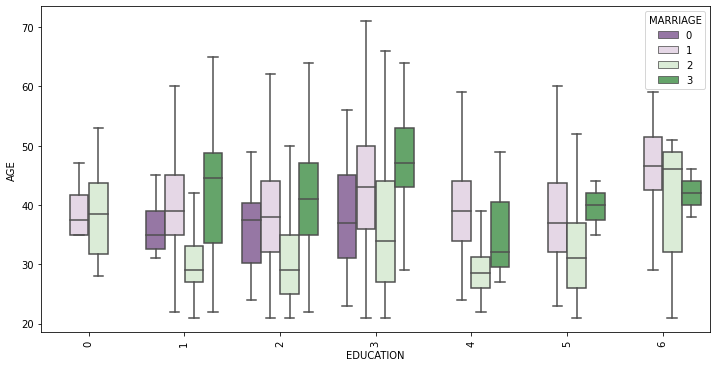

In [ ]:
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

On remarque que dans les 3 valeurs deja labelisées On a les 4 catégories de MARRIAGE.

 Du coup on s'interesse donc aux valeurs inconnues de l'éducation.

On commence par  Le Label 0 qui regroupe les types Marriage 1 et 2 et donc on peut dire que l'age moyen de cette catégories est 38 ans on peut donc penser a des gens qui sont autodidactes ou bien des gens qui ont suivis des formations particulières.

Pour les catégories 4 et 5, on remarques qu'ils regroupent les 3 catégories de marriage et ont presque les memes proportions on peut donc les mettre dans une catégorie bien definie on peut donc penser aux gens qui ont suivis des formations particulières ou bien des gens autodidactes.
On peut aussi conclure qu'il une possibilité de dépendances entre l'éducation(catégorie 4 et 5) avec l'age.

Finalement pour le label 6, ils regroupent les 3 catégories de marriage et a une moyenne d'age superieur au label 4 et 5 on peut donc penser a des doctorants et les regrouper ensembles.

Montrons les boîtes à moustaches avec la distribution de la limite du montant du crédit regroupées par statut matrimonial et niveau d'éducation.

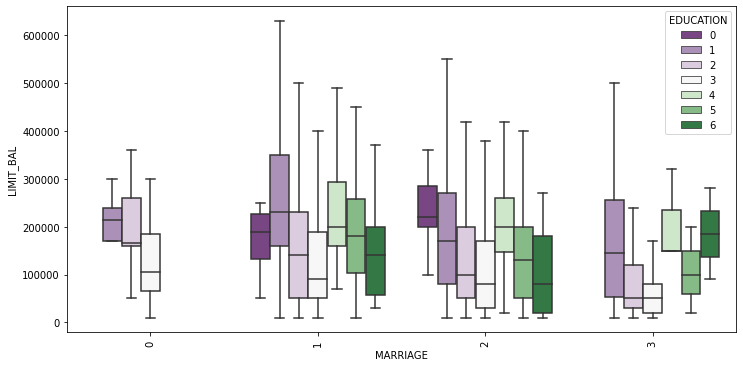

In [ ]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

Alors on remarque que dans les 3 valeurs deja labelisées On a les 4 catégories de MARRIAGE.

Du coup on s'interesse donc aux valeurs inconnues de l'éducation par rapport au limite du crédit.

On commence par Le Label 0 qui regroupe les types Marriage 1 et 2 et  on peut dire que la limite du crédit pour cette catégorie est de 2000000.

Pour les catégories 4, on peut dire qu'il ont le mémes niveaux de quartiles et on remarques qu'ils regroupent les 3 catégories de marriage  et a une moyenne pour la limite du crédit pour cette catégorie est de 2000000.

Finalement pour le label 5 et 6, il regroupe les 3 catégories de marriage et a une moyenne pour la limite de crédit de 120000 a peu près.

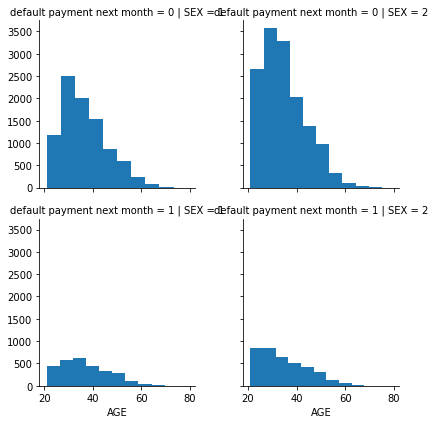

In [ ]:
g = sns.FacetGrid(df, row='default payment next month', col='SEX')
g = g.map(plt.hist, 'AGE')

On peut voir que les femmes du groupe d'âge 20-30 ont une tendance très élevée aux défauts de paiement par rapport aux hommes de toutes les tranches d'âge. Par conséquent, nous pouvons conserver la colonne SEXE des clients pour prédire la probabilité de défaut de paiement.

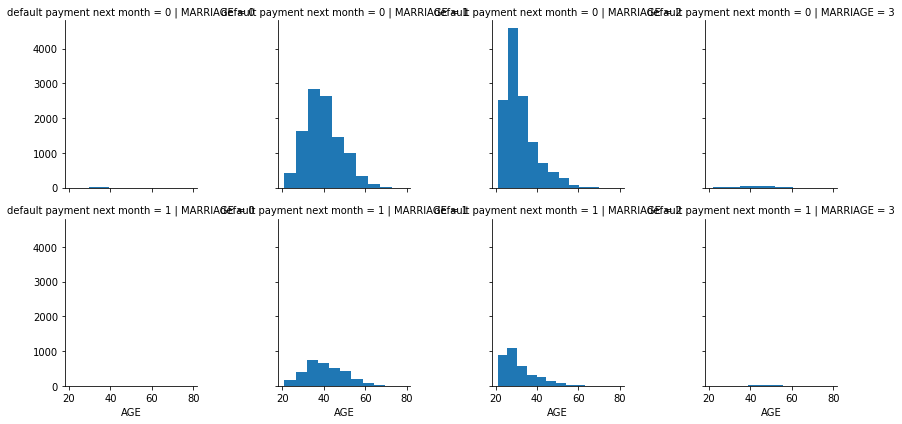

In [ ]:
g = sns.FacetGrid(df, row='default payment next month', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

À partir du graphique ci-dessus, nous pouvons déduire que les personnes mariées entre 30 et 50 ans et les clients célibataires de 20 à 30 ans ont tendance à faire défaut de paiement, les clients non mariés ayant une probabilité plus élevée de défaut de paiement. Par conséquent, nous pouvons inclure la fonction MARIAGE des clients pour trouver la probabilité de défaut de paiement le mois prochain.

#<font color='Red'> **Data Preperation**

On vient de voir qu'on a certaines lignes ou on a les amounts of Bills and Pay amounts =0 c'est a dire que la personne n'a ni payer ni a des choses a payer elle me rajoute donc pas d'informations concretement donc on va les enlever.

In [ ]:
index_names = df[(df['BILL_AMT1']==0) & (df['BILL_AMT2']==0) & (df['BILL_AMT3']==0) & (df['BILL_AMT4']==0) & (df['BILL_AMT5']==0) & (df['BILL_AMT6']==0) & (df['PAY_AMT1']==0) & (df['PAY_AMT2']==0) & (df['PAY_AMT3']==0) & (df['PAY_AMT4']==0) & (df['PAY_AMT5']==0) &  (df['PAY_AMT6']==0)].index
df.drop(index_names, inplace = True)

**Z Score**

On va déja commencer par régler le problème des valeurs aberrantes,  pour se faire on a choisit la méthode du Z score. On a opté pour cette méthode afin de rassembler les valeurs aberrantes et les rapporchées à la moyenne.

In [ ]:
cols=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
for var in cols:
  upper_limit = df[var].mean() + 3*df[var].std()
lower_limit = df[var].mean() - 3*df[var].std()
df[var] = np.where(
    df[var]>upper_limit,
    upper_limit,
    np.where(
      df[var]<lower_limit,
        lower_limit,
        df[var]
    )
)


**Oversampling**

L'oversampling est en effet une solution pour notre Dataset qui n'est pas équilibré . En effet, on a utiliser la méthode SMOTE qui consiste à suréchantillonner la classe minoritaire. (Dans notre cas, la classe "1" est minoritaire pour la colonne target "default payment next month")

In [ ]:
smote = SMOTE()
df_smote, y_smote = smote.fit_resample(df, df['default payment next month'])

In [ ]:
df_smote

LIMIT_BAL  SEX  ...      PAY_AMT6  default payment next month
0          20000    2  ...      0.000000                           1
1         120000    2  ...   2000.000000                           1
2          90000    2  ...   5000.000000                           0
3          50000    2  ...   1000.000000                           0
4          50000    1  ...    679.000000                           0
...          ...  ...  ...           ...                         ...
45731     230000    2  ...     49.530382                           1
45732     202116    2  ...    542.447668                           1
45733      20000    1  ...      0.000000                           1
45734      50000    1  ...    384.418783                           1
45735     411049    2  ...  15092.333376                           1

[45736 rows x 24 columns]

**Solution Pour corriger l’asymétrie qu'on a au niveau de nos Colonness Pay_AMT**

In [ ]:
col=['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
df_smote[col] = df_smote[col].apply(lambda x: np.log(x+3))

(array([ 6342.,   249.,   515.,  2406.,  8863., 18466.,  7354.,  1239.,
          282.,    20.]),
 array([ 1.09861229,  2.3567837 ,  3.61495511,  4.87312651,  6.13129792,
         7.38946933,  8.64764074,  9.90581215, 11.16398356, 12.42215496,
        13.68032637]),
 <a list of 10 Patch objects>)

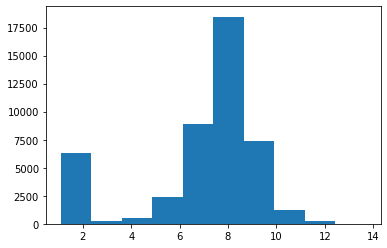

In [ ]:
plt.hist(df_smote['PAY_AMT1'])

comme on voit l'asymétrie a droite s'est régler on arrive a avoir une distribution plus homogène dans notre Dataset

df_smote.loc[(df_smote.AGE < 18),  'Age'] = 1 #Enfant-Ado
df_smote.loc[(df_smote.AGE >= 18),  'Age'] = 2 #Jeunes
df_smote.loc[(df_smote.AGE >= 30),  'Age'] = 3 #Adulte
df_smote.loc[(df_smote.AGE >= 60),  'Age'] = 4 #Vieux

On a penser en effet a diviser l'age en catégorie car ca ne nous rajoute rien d'avoir des ages continues c'est beaucoup mieux d'avoir des catégories qui represente les tranches d'ages affectés 

In [ ]:
df_smote.shape

(45736, 24)

**Standardization**

On a standardiser nos données afin de les avoir sur une meme echelle. On a choisi de faire la standardisation car on a constaté qu'il existe des grandes différences entre les plages, ce qui peut causer des problèmes à de nombreux modèles d'apprentissage.


In [ ]:
sc=StandardScaler()
scaled_features=sc.fit_transform(df_smote)

In [ ]:
df_smote = pd.DataFrame(scaled_features, index=df_smote.index, columns=df_smote.columns)

In [ ]:
df_smote

LIMIT_BAL       SEX  ...  PAY_AMT6  default payment next month
0      -1.050529  0.987959  ... -1.865110                         1.0
1      -0.249288  0.987959  ...  0.448722                         1.0
2      -0.489660  0.987959  ...  0.774388                        -1.0
3      -0.810157  0.987959  ...  0.202656                        -1.0
4      -0.810157 -1.012187  ...  0.065429                        -1.0
...          ...       ...  ...       ...                         ...
45731   0.632078  0.987959  ... -0.846628                         1.0
45732   0.408659  0.987959  ... -0.014057                         1.0
45733  -1.050529 -1.012187  ... -1.865110                         1.0
45734  -0.810157 -1.012187  ... -0.135765                         1.0
45735   2.082717  0.987959  ...  1.167278                         1.0

[45736 rows x 24 columns]

In [ ]:
col1=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

**Création de nouveaux features**

On a penser a créer des nouveaux features a partir des features qu'on a comme on a vu au niveau de Bill on a une tres forte corrélation donc si on a une idée sur BILL_AMT3 on peut savoir BILL_AMT4 comme ils sont trés corrèles 92% ( Partie Visualisation)

In [ ]:
df_smote['average_BILL_AMT'] = df_smote[col1].mean(axis=1)
df_smote

LIMIT_BAL       SEX  ...  default payment next month  average_BILL_AMT
0      -1.050529  0.987959  ...                         1.0         -0.666500
1      -0.249288  0.987959  ...                         1.0         -0.640908
2      -0.489660  0.987959  ...                        -1.0         -0.432992
3      -0.810157  0.987959  ...                        -1.0         -0.115588
4      -0.810157 -1.012187  ...                        -1.0         -0.407263
...          ...       ...  ...                         ...               ...
45731   0.632078  0.987959  ...                         1.0         -0.680352
45732   0.408659  0.987959  ...                         1.0          0.290943
45733  -1.050529 -1.012187  ...                         1.0         -0.668394
45734  -0.810157 -1.012187  ...                         1.0         -0.585122
45735   2.082717  0.987959  ...                         1.0          4.737387

[45736 rows x 25 columns]

In [ ]:
from sklearn.feature_selection import f_classif
array = df_smote.values
X1 = array[:,0:23]
Y1 = array[:,23]
X1

array([[-1.05052936,  0.98795949,  0.31119877, ..., -1.95081748,
        -1.92302737, -1.86510986],
       [-0.24928798,  0.98795949,  0.31119877, ...,  0.17293618,
        -1.92302737,  0.44872223],
       [-0.4896604 ,  0.98795949,  0.31119877, ...,  0.17293618,
         0.1776465 ,  0.77438818],
       ...,
       [-1.05052936, -1.01218726,  0.31119877, ..., -1.95081748,
        -1.92302737, -1.86510986],
       [-0.81015695, -1.01218726,  0.31119877, ...,  0.75381321,
        -0.16655152, -0.13576527],
       [ 2.08271703,  0.98795949,  0.31119877, ...,  1.09406916,
         1.03953323,  1.16727848]])

**On Utilise K_Best Pour la Sélection de nos Features**

In [ ]:
test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(X1, Y1)
fit.scores_
data = fit.transform(X1)
print(data[2500,:])

[ 0.23145684  0.98795949  1.05932017 -0.16250511 -0.09283577 -1.74725838
 -1.68631577 -1.68290151 -1.63464359 -2.24626571]


In [ ]:
features = fit.transform(X1)
print(features[0:5,:])

[[-1.05052936e+00  9.87959485e-01 -8.82370567e-01  1.62885032e+00
   1.61064948e+00 -8.97829086e-01 -8.42151961e-01 -1.68290151e+00
  -1.63464359e+00 -2.24626571e+00]
 [-2.49287984e-01  9.87959485e-01  1.05932017e+00 -1.05818283e+00
   1.61064948e+00 -4.83997890e-02  2.01184745e-03  4.96241161e-02
   1.79170452e+00 -2.24626571e+00]
 [-4.89660396e-01  9.87959485e-01  1.05932017e+00 -1.62505109e-01
  -9.28357747e-02 -4.83997890e-02  2.01184745e-03  4.96241161e-02
   7.85304664e-02  1.57825164e-01]
 [-8.10156946e-01  9.87959485e-01 -8.82370567e-01 -1.62505109e-01
  -9.28357747e-02 -4.83997890e-02  2.01184745e-03  4.96241161e-02
   7.85304664e-02  2.64077434e-01]
 [-8.10156946e-01 -1.01218726e+00 -8.82370567e-01 -1.05818283e+00
  -9.28357747e-02 -8.97829086e-01  2.01184745e-03  4.96241161e-02
   7.85304664e-02  2.64077434e-01]]


**Réduction de dimension en utlisant le PCA:**

In [ ]:
#from sklearn.decomposition import PCA
# on crée une instance de PCA
#pca = PCA()
# Appliquer ACP sur les données
#pca.fit(df_smote)
#df_smote

#<font color='red'> **Modélisation et Évaluation**

In [ ]:
df_smote.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'average_BILL_AMT'],
      dtype='object')

In [ ]:
X= df_smote.drop('default payment next month',axis=1)
y=df_smote[['default payment next month']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### **Logistic Regression** 

La régularisation fait généralement référence au concept selon lequel il devrait y avoir une pénalité de complexité pour les paramètres plus extrêmes. L'idée est que le simple fait de regarder les données d'entraînement et de ne pas prêter attention à l'extrême de ses paramètres conduit à un surapprentissage. Une valeur élevée de C indique au modèle de donner un poids élevé aux données d'apprentissage et un poids inférieur à la pénalité de complexité. Une valeur faible indique au modèle d'accorder plus de poids à cette pénalité de complexité au détriment de l'ajustement aux données d'apprentissage. Fondamentalement, un C élevé signifie "faites beaucoup confiance à ces données d'entraînement", tandis qu'une valeur faible indique "Ces données peuvent ne pas être entièrement représentatives des données du monde réel.

In [ ]:
param_grid = {'C': np.logspace(-5, 8, 15)}

logreg = LogisticRegression()

logreg_cv = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=0)

logreg_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}


Accuracy: 0.7274814167031045

              precision    recall  f1-score   support

        -1.0       0.72      0.74      0.73      4519
         1.0       0.74      0.71      0.73      4629

    accuracy                           0.73      9148
   macro avg       0.73      0.73      0.73      9148
weighted avg       0.73      0.73      0.73      9148


Average 5-Fold CV Score: 0.7225 , Standard deviation: 0.0438


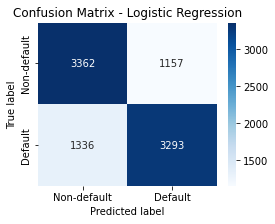

In [ ]:
LR = LogisticRegression(C=3.727593720314938, random_state=0)
LR.fit(X_train, y_train)
y_pred_logistic = LR.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred_logistic,y_test))

 
cv_scores =cross_val_score(LR, X, y, cv=5)


print()
print(classification_report(y_test, y_pred_logistic))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

On peut voir que le modéle Logistic Regression a predit 6655 valeurs  vraies dont 3293 positifs et 3362 négatifs par rapport à 4106 valeurs fausses.Ce modéle presente des valeurs identiques entre l'acuracy ,precision , recall et le f1-score. 

Meme si ces resultats sont acceptables ,ce modéle reste moin performant que les autres modéles.Du coup il est trés probalement que le Logistic Regression n'est pas le meilleur choix pour ce jeu de données. 

### **Decision Tree**

In [ ]:
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()

tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)

tree_cv.fit(X_train, y_train)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 9, 'criterion': 'gini'}


Accuracy: 0.7376475732400525

              precision    recall  f1-score   support

        -1.0       0.70      0.82      0.76      4519
         1.0       0.79      0.65      0.72      4629

    accuracy                           0.74      9148
   macro avg       0.75      0.74      0.74      9148
weighted avg       0.75      0.74      0.74      9148


Average 5-Fold CV Score: 0.7329 , Standard deviation: 0.0506


Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

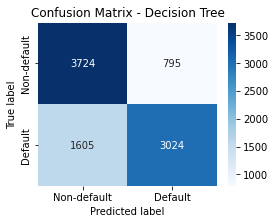

In [ ]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 9, 
                                     max_features= 5, min_samples_leaf= 1, 
                                     random_state=0)
Tree.fit(X_train, y_train)
y_pred_tree = Tree.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred_tree,y_test))

cv_scores =cross_val_score(Tree, X, y, cv=5)

print()
print(classification_report(y_test, y_pred_tree))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Tree.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree")

On peut voir que la modèle décision Tree a prédit 6748 valeurs vraies dont 3024 positifs et 3724 négatifs par rapport à 3916 valeurs fausses. On peut conclure quoique la valeur de précision est inférieure à celle de l'autre modèle, le modèle décision tree est plus adéquat à note jeu de données que le modèle logistic régression.


 On peut conclure quoique la valeur de précision est inférieure à celle de l'autre modèle, le modèle décision tree est plus adéquat à note jeu de données que le modèle logistic régression.

### **Random Forest**

In [ ]:
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(X, y)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 100, 'max_features': 2, 'max_depth': 9, 'criterion': 'entropy'}


Accuracy: 0.7782028858766944

              precision    recall  f1-score   support

        -1.0       0.74      0.84      0.79      4519
         1.0       0.82      0.72      0.77      4629

    accuracy                           0.78      9148
   macro avg       0.78      0.78      0.78      9148
weighted avg       0.78      0.78      0.78      9148


Average 5-Fold CV Score: 0.7688 , Standard deviation: 0.0417


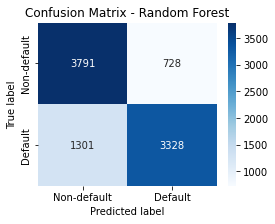

In [ ]:
Ran = RandomForestClassifier(criterion= 'entropy', max_depth= 9, 
                                     max_features= 2, n_estimators= 100, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred_randomForest = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred_randomForest,y_test))

cv_scores =cross_val_score(Ran, X, y, cv=5)

print()
print(classification_report(y_test, y_pred_randomForest))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");

On peut voir que la modèle random forest a prédit 7119 valeurs vraies dont 3328 positifs et 3791 négatifs par rapport à 3429 valeurs fausses. On peut conclure la modèle random Forest est plus efficace que les deux dernières modèles.

 On peut conclure la modèle random Forest est plus efficace que les deux dernières modèles.

### **KNN**

In [ ]:
param_dist = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

kn = KNeighborsClassifier()

kn_cv = RandomizedSearchCV(kn, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

kn_cv.fit(X, y)

print("Tuned Random KNN Parameters: %s" % (kn_cv.best_params_))

Tuned Random KNN Parameters: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}


Accuracy: 0.8125273283777875

              precision    recall  f1-score   support

        -1.0       0.83      0.79      0.81      4519
         1.0       0.80      0.84      0.82      4629

    accuracy                           0.81      9148
   macro avg       0.81      0.81      0.81      9148
weighted avg       0.81      0.81      0.81      9148


Average 5-Fold CV Score: 0.8027 , Standard deviation: 0.0473


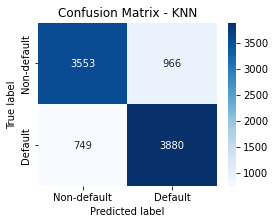

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9, weights='distance',metric='manhattan')
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
y_pred_KNN = knn.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred_KNN,y_test))

cv_scores =cross_val_score(knn, X, y, cv=5)

print()
print(classification_report(y_test, y_pred_KNN))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,knn.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - KNN");

On peut voir que la modèle KNN a prédit 7433 valeurs vraies dont 3880 positifs et 3553 négatifs par rapport à 2872 valeurs fausses. On peut conclure la modèle random KNN est le meilleur choix pour notre jeu de données.

### **ANN**

In [ ]:
X= df.drop('default payment next month',axis=1)
y=df[['default payment next month']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
batch_size = 100
epochs = 10

model = Sequential()
model.add(Dense(6, activation = 'relu', input_dim = 23))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 144       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

history = model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/10
234/234 [==============================] - 1s 2ms/step - loss: 701.0143 - accuracy: 0.6918
Epoch 2/10
234/234 [==============================] - 0s 2ms/step - loss: 138.0786 - accuracy: 0.6858
Epoch 3/10
234/234 [==============================] - 0s 2ms/step - loss: 58.4263 - accuracy: 0.6895
Epoch 4/10
234/234 [==============================] - 0s 2ms/step - loss: 20.6144 - accuracy: 0.6890
Epoch 5/10
234/234 [==============================] - 0s 2ms/step - loss: 7.5996 - accuracy: 0.6878
Epoch 6/10
234/234 [==============================] - 0s 2ms/step - loss: 6.2782 - accuracy: 0.6871
Epoch 7/10
234/234 [==============================] - 0s 2ms/step - loss: 4.7070 - accuracy: 0.6909
Epoch 8/10
234/234 [==============================] - 0s 2ms/step - loss: 4.3317 - accuracy: 0.6902
Epoch 9/10
234/234 [==============================] - 0s 2ms/step - loss: 3.4930 - accuracy: 0.6957
Epoch 10/10
234/234 [==============================] - 0s 2ms/step - loss: 2.9002 - accuracy: 

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.7639102935791016


On a un résultat de 76% le modele donne d'asssez bon résultat.

### **Naive Bayes**

Une courbe gaussienne peut servir de filtre « passe-bas », permettant uniquement aux échantillons proches de sa moyenne de « passer ». Dans le contexte de Naive Bayes, supposer une distribution gaussienne donne essentiellement plus de poids aux échantillons plus proches de la moyenne de la distribution. Cela peut être approprié ou non selon si ce que vous voulez prédire suit une distribution normale.

La variable, var_smoothing, ajoute artificiellement une valeur définie par l'utilisateur à la variance de la distribution (dont la valeur par défaut est dérivée de l'ensemble de données d'apprentissage). Cela élargit (ou "lisse") essentiellement la courbe et prend en compte davantage d'échantillons qui sont plus éloignés de la moyenne de distribution.

In [ ]:
X= df_smote.drop('default payment next month',axis=1)
y=df_smote[['default payment next month']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
param_dist = {'var_smoothing': np.logspace(0,-9, num=100)}


gn = GaussianNB()

gn_cv = RandomizedSearchCV(gn, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

gn_cv.fit(X, y)

print("Tuned Naive Bayes Parameters: %s" % (gn_cv.best_params_))

Tuned Naive Bayes Parameters: {'var_smoothing': 0.657933224657568}


Accuracy: 0.7029951902055094

              precision    recall  f1-score   support

        -1.0       0.65      0.85      0.74      4519
         1.0       0.79      0.56      0.66      4629

    accuracy                           0.70      9148
   macro avg       0.72      0.70      0.70      9148
weighted avg       0.72      0.70      0.70      9148


Average 5-Fold CV Score: 0.6924 , Standard deviation: 0.0085


Text(0.5, 1.0, 'Confusion Matrix - Naive Bayes')

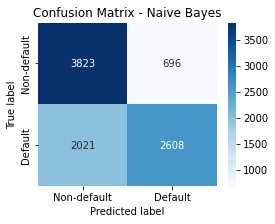

In [ ]:
gnb = GaussianNB(var_smoothing=0.657933224657568)
gnb.fit(X_train, y_train)
gnb.score(X_test,y_test)
y_pred_naive = gnb.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred_naive,y_test))

cv_scores =cross_val_score(gnb, X, y, cv=5)

print()
print(classification_report(y_test, y_pred_naive))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,gnb.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Naive Bayes")

On peut voir que la modèle Naïve Bayes a prédit 6431 valeurs vraies dont 2608 positifs et 3823 négatifs par rapport à 2717 valeurs fausses. La différence entre les résultats de chaque mesure d'évaluation est très grande et même ces résultats sont globalement très faibles.

 On peut conclure la modèle Naïve Bayes est le plus mauvais modèle.

### **Linear Discriminant Analysis**

L'analyse discriminante linéaire est utilisée comme outil de classification, de réduction des dimensions et de visualisation des données. Il existe depuis un certain temps maintenant. Malgré sa simplicité, LDA produit souvent des résultats de classification robustes, décents et interprétables. Lorsqu'il s'agit de résoudre des problèmes de classification du monde réel, la LDA est souvent la première méthode d'analyse comparative avant que d'autres plus complexes et plus flexibles ne soient utilisées.

Accuracy: 0.7029951902055094

              precision    recall  f1-score   support

        -1.0       0.71      0.74      0.73      4519
         1.0       0.74      0.71      0.72      4629

    accuracy                           0.73      9148
   macro avg       0.73      0.73      0.73      9148
weighted avg       0.73      0.73      0.73      9148


Average 5-Fold CV Score: 0.895 , Standard deviation: 0.0261


Text(0.5, 1.0, 'Confusion Matrix - LDA')

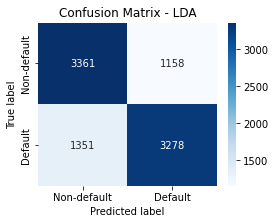

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)

model = LinearDiscriminantAnalysis()

cv_scores =cross_val_score(model, X, y, cv=5)

model.fit(X_train, y_train)
model.score(X_test,y_test)
y_pred_naive = gnb.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred_naive,y_test))

y_pred = model.predict(X_test)

print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - LDA")

On peut voir que le modèle LDA a prédit 6671 valeurs  vraies dont 3278 positifs et 3361 négatifs par rapport à 4106 valeurs fausses.Ce modéle presente des valeurs identiques entre l'acuracy ,precision , recall et le f1-score. 

Les resultats sont très médiocres du coup ce modèle reste moins performant que les autres modèles.

## **SVM**

In [ ]:
sv = SVC()
param_dist = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly','sigmoid','linear']}
 
sv_cv = RandomizedSearchCV(sv, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

sv_cv.fit(X, y)

print("Tuned SVM Parameters: %s" % (sv_cv.best_params_))

Tuned SVM Parameters: {'kernel': 'poly', 'gamma': 0.001, 'C': 1000}


Accuracy: 0.7432225623087013

              precision    recall  f1-score   support

        -1.0       0.72      0.80      0.75      4519
         1.0       0.78      0.69      0.73      4629

    accuracy                           0.74      9148
   macro avg       0.75      0.74      0.74      9148
weighted avg       0.75      0.74      0.74      9148


Average 5-Fold CV Score: 0.917 , Standard deviation: 0.0133


Text(0.5, 1.0, 'Confusion Matrix - SVM')

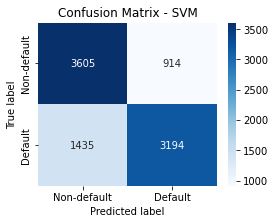

In [ ]:
svm = SVC(kernel='poly', gamma= 0.001,C=1000)
svm.fit(X_train, y_train)
svm.score(X_test,y_test)
y_pred_SVM = svm.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred_SVM,y_test))

cv_scores =cross_val_score(svm, X, y, cv=5)

print()
print(classification_report(y_test, y_pred_SVM))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,svm.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM")

On peut voir que le modèle SVM a prédit 6799 valeurs vraies dont 3194 positifs et 3605 négatifs par rapport à 2349 valeurs fausses. La différence entre les messures d'évalution sont negligeables Du coup on peut conclure que la modèle SVM est le modèle le plus équilibré .

## **AdaBoost**

In [ ]:
ada = AdaBoostClassifier()
param_dist = {'n_estimators': [10, 50, 100, 500],
              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]
             }
 
ada_cv = RandomizedSearchCV(ada, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

ada_cv.fit(X, y)

print("Tuned Ada Parameters: %s" % (ada_cv.best_params_))

Tuned Ada Parameters: {'n_estimators': 50, 'learning_rate': 1.0}


Accuracy: 0.7621337997376476

              precision    recall  f1-score   support

        -1.0       0.74      0.79      0.77      4519
         1.0       0.78      0.73      0.76      4629

    accuracy                           0.76      9148
   macro avg       0.76      0.76      0.76      9148
weighted avg       0.76      0.76      0.76      9148


Average 5-Fold CV Score: 0.94 , Standard deviation: 0.0257


Text(0.5, 1.0, 'Confusion Matrix - SVM')

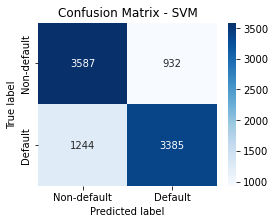

In [ ]:
X, y = make_classification(n_samples=1000, n_features=24,
                          random_state=0, shuffle=False)
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1.0,random_state=0)
ada.fit(X_train, y_train)
ada.score(X_test, y_test)
y_pred_ada = ada.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred_ada,y_test))

cv_scores =cross_val_score(ada, X, y, cv=5)

print()
print(classification_report(y_test, y_pred_ada))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,ada.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM")


On peut voir que la modèle adaboost a prédit 7032 valeurs vraies dont 3385 positifs et 3575 négatifs par rapport à 2176 valeurs fausses. La différence entre les messures d'évalution sont negligeables et on peut conclure que le modèle adaboost est efficace .

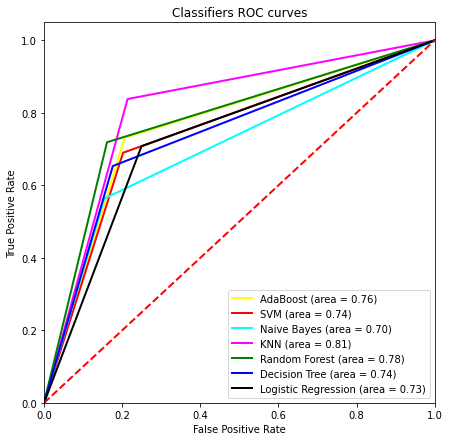

In [ ]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_ada) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_SVM) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_naive)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_KNN) 
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(y_test, y_pred_randomForest) 
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, threshold6 = roc_curve(y_test, y_pred_tree) 
roc_auc6 = auc(fpr6, tpr6)
fpr7, tpr7, threshold7 = roc_curve(y_test, y_pred_logistic) 
roc_auc7 = auc(fpr7, tpr7)

plt.figure(figsize=(7,7)) 
plt.plot(fpr1, tpr1, color='yellow', lw=2, label='AdaBoost (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='SVM (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='cyan', lw=2, label='Naive Bayes (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='magenta', lw=2, label='KNN (area = %0.2f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='green', lw=2, label='Random Forest (area = %0.2f)'% roc_auc5)
plt.plot(fpr6, tpr6, color='blue', lw=2, label='Decision Tree (area = %0.2f)'% roc_auc6)
plt.plot(fpr7, tpr7, color='black', lw=2, label='Logistic Regression (area = %0.2f)'% roc_auc7)



plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

D'après la courbe ROC on peut conclure que le Knn meilleur modèle car il a le plus grand AUC et random forest le suit en deuxième position. D'autre part  Naive Bayes donne les pires résultats dans notre cas.

#<font color='Black'> **Deployement**

In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle
import pickle

In [ ]:
!pip install flask

In [ ]:
df_smote.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'average_BILL_AMT'],
      dtype='object')

On s'est contenté de faire l'implementation des 6 payments qui represente les valeurs les plus corréles pour essayer notre model.

In [ ]:
col=['PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
X= df_smote[col]
y=df_smote[['default payment next month']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9, weights='distance',metric='manhattan')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [ ]:
pickle.dump(knn, open('model.pkl','wb'))

Ceci represente le code Flask qui relie notre model model.pk1 et notre template qui se retrouve dans le fichier Flask App. Pour pouvoir exécuter notre application Il faudrait aller au fichier Flask app ouvrir un terminal et taper la commande python app.py . ce code a lui seul sur le notebook ne marche pas .

In [ ]:
app = Flask(__name__)
model = pickle.load(open('model.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [int(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)

    output = round(prediction[0], 2)

    return render_template('index.html', prediction_text='Prediction Is {}'.format(output))


if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: ignored